**To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:**

**Derive the descriptive statistics of the data and discuss the points you find remarkable.**

**Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.**

**In your chosen state, which of the lessons are the students more successful, math or reading?**

**What are the distributions of the math and reading scores in the sample?**

**Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.**

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [139]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()



In [140]:
useducation_c = useducation.copy()

In [141]:
#change all the wrong state to real one
useducation_c['STATE'].replace(to_replace =['COMMONWEALTH_OF_MARIANAS', 'MARIANAS',  'NORTHERN_MARIANAS' ,  'NORTHERN_MARIANA_ISLANDS',  'MP'], value ='Northern Mariana Island', inplace=True) 
useducation_c['STATE'].replace(to_replace =['VIRGIN_ISLANDS',  'U.S._VIRGIN_ISLANDS' , 'VI'], value ='U.S. Virgin Island', inplace = True)
useducation_c['STATE'].replace(to_replace =['PR'], value ='PUERTO_RICO', inplace = True)
useducation_c['STATE'].replace(to_replace =['GU'], value ='GUAM', inplace = True)
useducation_c['STATE'].replace(to_replace =['AS'], value ='AMERICAN_SAMOA', inplace=True)
useducation_c['STATE'].replace(to_replace =['BUREAU_OF_INDIAN_AFFAIRS',  'BI',  'BIE',  'BUREAU_OF_INDIAN_EDUCATIO',  'BUREAU_OF_INDIAN_EDUCATION'], value ='DISTRICT_OF_COLUMBIA', inplace=True)
useducation_c['STATE'].replace(to_replace =['DOD_-_OVERSEAS',  'DOD_-_DOMESTIC',  'DOD','DOD_OVERSEAS', 'DOD_DOMESTIC','DD','DEPARTMENT_OF_DEFENSE','DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY', 'DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)' ,  'DOD_-_FOREIGN'], value ='VIRGINIA', inplace=True)

useducation_c['STATE'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'WYOMING', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'AMERICAN_SAMOA', 'GUAM',
       'Northern Mariana Island', 'PUERTO_RICO', 'U.S. Virgin Island'],
      dtype=object)

In [142]:
useducation_c.replace(to_replace =['n/a', 'na', 'nan','NaN','NA', '--','...', 'inf'], value ='NaN', inplace = True)

In [143]:
useducation_c.columns = [x.capitalize() for x in useducation_c.columns]
useducation_c.State = [x.capitalize() for x in useducation_c.State]

In [144]:
use_c=useducation_c.groupby("State")

In [145]:
used_c = use_c.apply(lambda x: x.fillna(x.interpolate(method = 'linear', axis = 0, limit_direction = 'both')))
used_c.head()

,Primary_key,State,Year,Enroll,Total_revenue,Federal_revenue,State_revenue,Local_revenue,Total_expenditure,Instruction_expenditure,...,Grades_4_g,Grades_8_g,Grades_12_g,Grades_1_8_g,Grades_9_12_g,Grades_all_g,Avg_math_4_score,Avg_math_8_score,Avg_reading_4_score,Avg_reading_8_score
0,1992_ALABAMA,Alabama,1992,727716.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,260.276441
1,1992_ALASKA,Alaska,1992,121156.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,223.833455,277.643071,211.547154,258.859712
2,1992_ARIZONA,Arizona,1992,676297.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,Arkansas,1992,311432.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,California,1992,5129788.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,269.197451


In [146]:
#used_c.dropna(inplace=True)

In [147]:
# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
used_c["winsorized_revenue"] = winsorized_views = winsorize(used_c["Total_revenue"], (0, 0.10))
used_c["winsorized_expenditure"] = winsorized_views = winsorize(used_c["Total_expenditure"], (0, 0.10))




### Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [148]:
used_c.describe()

,Year,Enroll,Total_revenue,Federal_revenue,State_revenue,Local_revenue,Total_expenditure,Instruction_expenditure,Support_services_expenditure,Other_expenditure,...,Grades_12_g,Grades_1_8_g,Grades_9_12_g,Grades_all_g,Avg_math_4_score,Avg_math_8_score,Avg_reading_4_score,Avg_reading_8_score,winsorized_revenue,winsorized_expenditure
count,1492.000000,1.375000e+03,1.375000e+03,1.375000e+03,1.375000e+03,1.375000e+03,1.375000e+03,1.375000e+03,1.375000e+03,1.375000e+03,...,1492.000000,1.492000e+03,1.492000e+03,1.468000e+03,1375.000000,1375.000000,1375.000000,1375.000000,1.492000e+03,1.492000e+03
mean,2004.433646,9.114335e+05,9.299796e+06,7.754173e+05,4.283965e+06,4.240414e+06,9.397709e+06,4.880829e+06,2.748991e+06,4.282500e+05,...,54069.390416,5.133858e+05,2.449830e+05,7.885083e+05,232.913660,277.359648,218.565282,263.150709,1.226209e+07,1.252182e+07
std,7.393983,1.050965e+06,1.187749e+07,1.139582e+06,5.607671e+06,5.563954e+06,1.207967e+07,6.370321e+06,3.391181e+06,5.302949e+05,...,68723.558793,6.436959e+05,3.090179e+05,9.783147e+05,10.565938,10.274194,7.823918,6.194895,1.504040e+07,1.559620e+07
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102,4.656500e+05,4.816650e+05
25%,1998.000000,2.468835e+05,2.187933e+06,1.895955e+05,1.159141e+06,7.466000e+05,2.165280e+06,1.170053e+06,6.366730e+05,9.960350e+04,...,10679.500000,1.021030e+05,4.938125e+04,1.686838e+05,226.352305,271.264987,214.315631,259.229461,2.364758e+06,2.326576e+06
50%,2004.000000,6.543630e+05,5.251014e+06,4.201520e+05,2.615320e+06,2.104644e+06,5.397194e+06,2.737356e+06,1.559219e+06,2.714000e+05,...,36387.000000,3.409950e+05,1.607335e+05,5.284875e+05,234.421429,279.055956,220.217617,264.257025,5.980250e+06,6.025704e+06
75%,2011.000000,1.035321e+06,1.158541e+07,8.919560e+05,5.530188e+06,5.087060e+06,1.138048e+07,5.825766e+06,3.449893e+06,5.366075e+05,...,67584.250000,6.086170e+05,2.905666e+05,9.185050e+05,241.054038,284.431161,223.892232,267.668075,1.476812e+07,1.491242e+07
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130,5.076254e+07,5.269183e+07


as we can see mean of total revenue and total expenditure is lower in winsorized revenue and expenditure

In [149]:
# descriptive statistics for just text-based variables
used_c.describe(include=['O'])

,Primary_key,State
count,1492,1492
unique,1487,56
top,2008_VIRGINIA,Virginia
freq,3,57


In [150]:
# descriptive statistics for all variables
used_c.describe(include= 'all')

,Primary_key,State,Year,Enroll,Total_revenue,Federal_revenue,State_revenue,Local_revenue,Total_expenditure,Instruction_expenditure,...,Grades_12_g,Grades_1_8_g,Grades_9_12_g,Grades_all_g,Avg_math_4_score,Avg_math_8_score,Avg_reading_4_score,Avg_reading_8_score,winsorized_revenue,winsorized_expenditure
count,1492,1492,1492.000000,1.375000e+03,1.375000e+03,1.375000e+03,1.375000e+03,1.375000e+03,1.375000e+03,1.375000e+03,...,1492.000000,1.492000e+03,1.492000e+03,1.468000e+03,1375.000000,1375.000000,1375.000000,1375.000000,1.492000e+03,1.492000e+03
unique,1487,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.114335e+05,9.299796e+06,7.754173e+05,4.283965e+06,4.240414e+06,9.397709e+06,4.880829e+06,...,54069.390416,5.133858e+05,2.449830e+05,7.885083e+05,232.913660,277.359648,218.565282,263.150709,1.226209e+07,1.252182e+07
std,NaN,NaN,7.393983,1.050965e+06,1.187749e+07,1.139582e+06,5.607671e+06,5.563954e+06,1.207967e+07,6.370321e+06,...,68723.558793,6.436959e+05,3.090179e+05,9.783147e+05,10.565938,10.274194,7.823918,6.194895,1.504040e+07,1.559620e+07
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102,4.656500e+05,4.816650e+05
25%,NaN,NaN,1998.000000,2.468835e+05,2.187933e+06,1.895955e+05,1.159141e+06,7.466000e+05,2.165280e+06,1.170053e+06,...,10679.500000,1.021030e+05,4.938125e+04,1.686838e+05,226.352305,271.264987,214.315631,259.229461,2.364758e+06,2.326576e+06
50%,NaN,NaN,2004.000000,6.543630e+05,5.251014e+06,4.201520e+05,2.615320e+06,2.104644e+06,5.397194e+06,2.737356e+06,...,36387.000000,3.409950e+05,1.607335e+05,5.284875e+05,234.421429,279.055956,220.217617,264.257025,5.980250e+06,6.025704e+06
75%,NaN,NaN,2011.000000,1.035321e+06,1.158541e+07,8.919560e+05,5.530188e+06,5.087060e+06,1.138048e+07,5.825766e+06,...,67584.250000,6.086170e+05,2.905666e+05,9.185050e+05,241.054038,284.431161,223.892232,267.668075,1.476812e+07,1.491242e+07


### Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

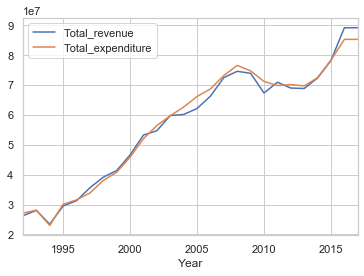

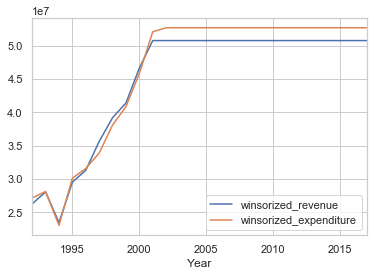

In [151]:

used_c[used_c['State']=='California'].plot(x= 'Year', y =['Total_revenue','Total_expenditure'] )


used_c[used_c['State']=='California'].plot(x= 'Year', y =['winsorized_revenue', 'winsorized_expenditure'])




### In your chosen state, which of the lessons are the students more successful, math or reading?

<BarContainer object of 26 artists>

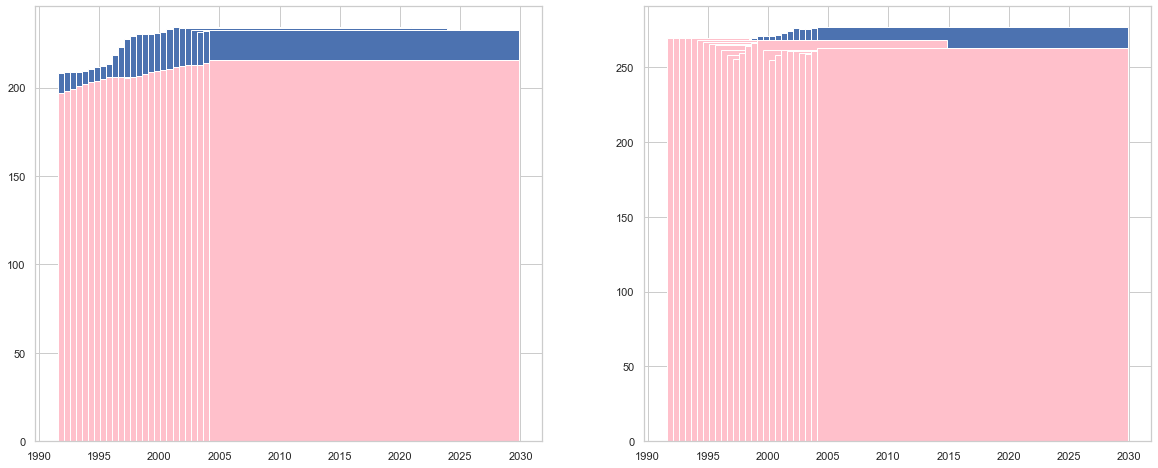

In [152]:
used_cali = used_c[used_c['State']=='California']

plt.figure(figsize = (20,8))

plt.subplot(1,2,1)

plt.bar( x = used_cali['Year'], height = used_cali['Avg_math_4_score'],  linewidth = 1 )
plt.bar( x = used_cali['Year'], height = used_cali['Avg_reading_4_score'], linewidth= 1, color = 'pink')

plt.subplot(1,2,2)
plt.bar( x = used_cali['Year'], height = used_cali['Avg_math_8_score'], linewidth = 1 )
plt.bar( x = used_cali['Year'], height = used_cali['Avg_reading_8_score'], linewidth= 1, color = 'pink')


#used_c[used_c['State']=='California'].hist('Avg_math_4_score', by = 'Year' )


#used_c[used_c['State']=='California'].hist(x= 'Year', y =['Avg_math_8_score', 'Avg_reading_8_score'])


math has higher grade than reading

### What are the distributions of the math and reading scores in the sample?

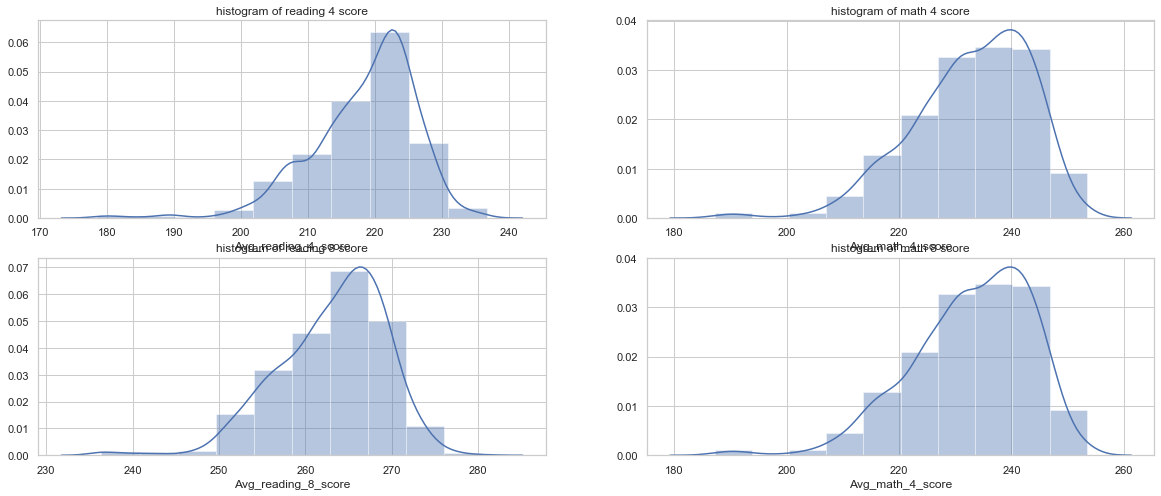

In [153]:
plt.figure(figsize = (20,8))


plt.subplot(2,2,1)
sns.distplot(used_c['Avg_reading_4_score'].dropna(), bins=10)
plt.title("histogram of reading 4 score")

plt.subplot(2,2,2)
sns.distplot(used_c['Avg_math_4_score'].dropna(), bins=10)
plt.title("histogram of math 4 score")

plt.subplot(2,2,3)
sns.distplot(used_c['Avg_reading_8_score'].dropna(), bins=10)
plt.title("histogram of reading 8 score")

plt.subplot(2,2,4)
sns.distplot(used_c['Avg_math_4_score'].dropna(), bins = 10)
plt.title("histogram of math 8 score")


plt.show()


skew to left

### Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [154]:
used_c[used_c['Avg_math_4_score'].isnull()]

,Primary_key,State,Year,Enroll,Total_revenue,Federal_revenue,State_revenue,Local_revenue,Total_expenditure,Instruction_expenditure,...,Grades_12_g,Grades_1_8_g,Grades_9_12_g,Grades_all_g,Avg_math_4_score,Avg_math_8_score,Avg_reading_4_score,Avg_reading_8_score,winsorized_revenue,winsorized_expenditure
1288,2001_AMERICAN_SAMOA,American_samoa,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,838.0,9507.0,3938.0,14880.0,NaN,NaN,NaN,NaN,50762544.0,52691826.0
1289,2001_GUAM,Guam,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1539.0,20323.0,8859.0,29656.0,NaN,NaN,NaN,NaN,50762544.0,52691826.0
1290,2001_NORTHERN_MARIANAS,Northern mariana island,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,432.0,6773.0,2464.0,9760.0,NaN,NaN,NaN,NaN,50762544.0,52691826.0
1291,2001_PUERTO_RICO,Puerto_rico,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32699.0,382071.0,159891.0,542825.0,NaN,NaN,NaN,NaN,50762544.0,52691826.0
1292,2001_VIRGIN_ISLANDS,U.s. virgin island,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,995.0,9250.0,4890.0,NaN,NaN,NaN,NaN,NaN,50762544.0,52691826.0
1294,2012_AMERICAN_SAMOA,American_samoa,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,883.2,9442.4,4075.0,14977.4,NaN,NaN,NaN,NaN,50762544.0,52691826.0
1296,2012_GUAM,Guam,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1561.0,18946.0,10020.0,28979.0,NaN,NaN,NaN,NaN,50762544.0,52691826.0
1297,2012_NORTHERN_MARIANA_ISLANDS,Northern mariana island,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,630.0,6297.0,3250.0,10009.0,NaN,NaN,NaN,NaN,50762544.0,52691826.0
1298,2012_PUERTO_RICO,Puerto_rico,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27169.0,266387.0,124638.0,392075.0,NaN,NaN,NaN,NaN,50762544.0,52691826.0
1299,2012_VIRGIN_ISLANDS,U.s. virgin island,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,995.0,9250.0,4890.0,NaN,NaN,NaN,NaN,NaN,50762544.0,52691826.0


In [155]:
used_c['Avg_math_4_score'].unique()

array([208.32787592, 223.83345456, 215.25393202, ..., 236.05701891,
       240.38921339, 247.82061921])

In [157]:
# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
used_c["winsorized_reading4"] = winsorized_views = winsorize(used_c["Avg_reading_4_score"], (0, 0.10))
used_c["winsorized_math4"] = winsorized_views = winsorize(used_c["Avg_math_4_score"], (0, 0.10))

used_c["winsorized_reading8"] = winsorized_views = winsorize(used_c["Avg_reading_8_score"], (0, 0.10))
used_c["winsorized_math8"] = winsorized_views = winsorize(used_c["Avg_math_8_score"], (0, 0.10))



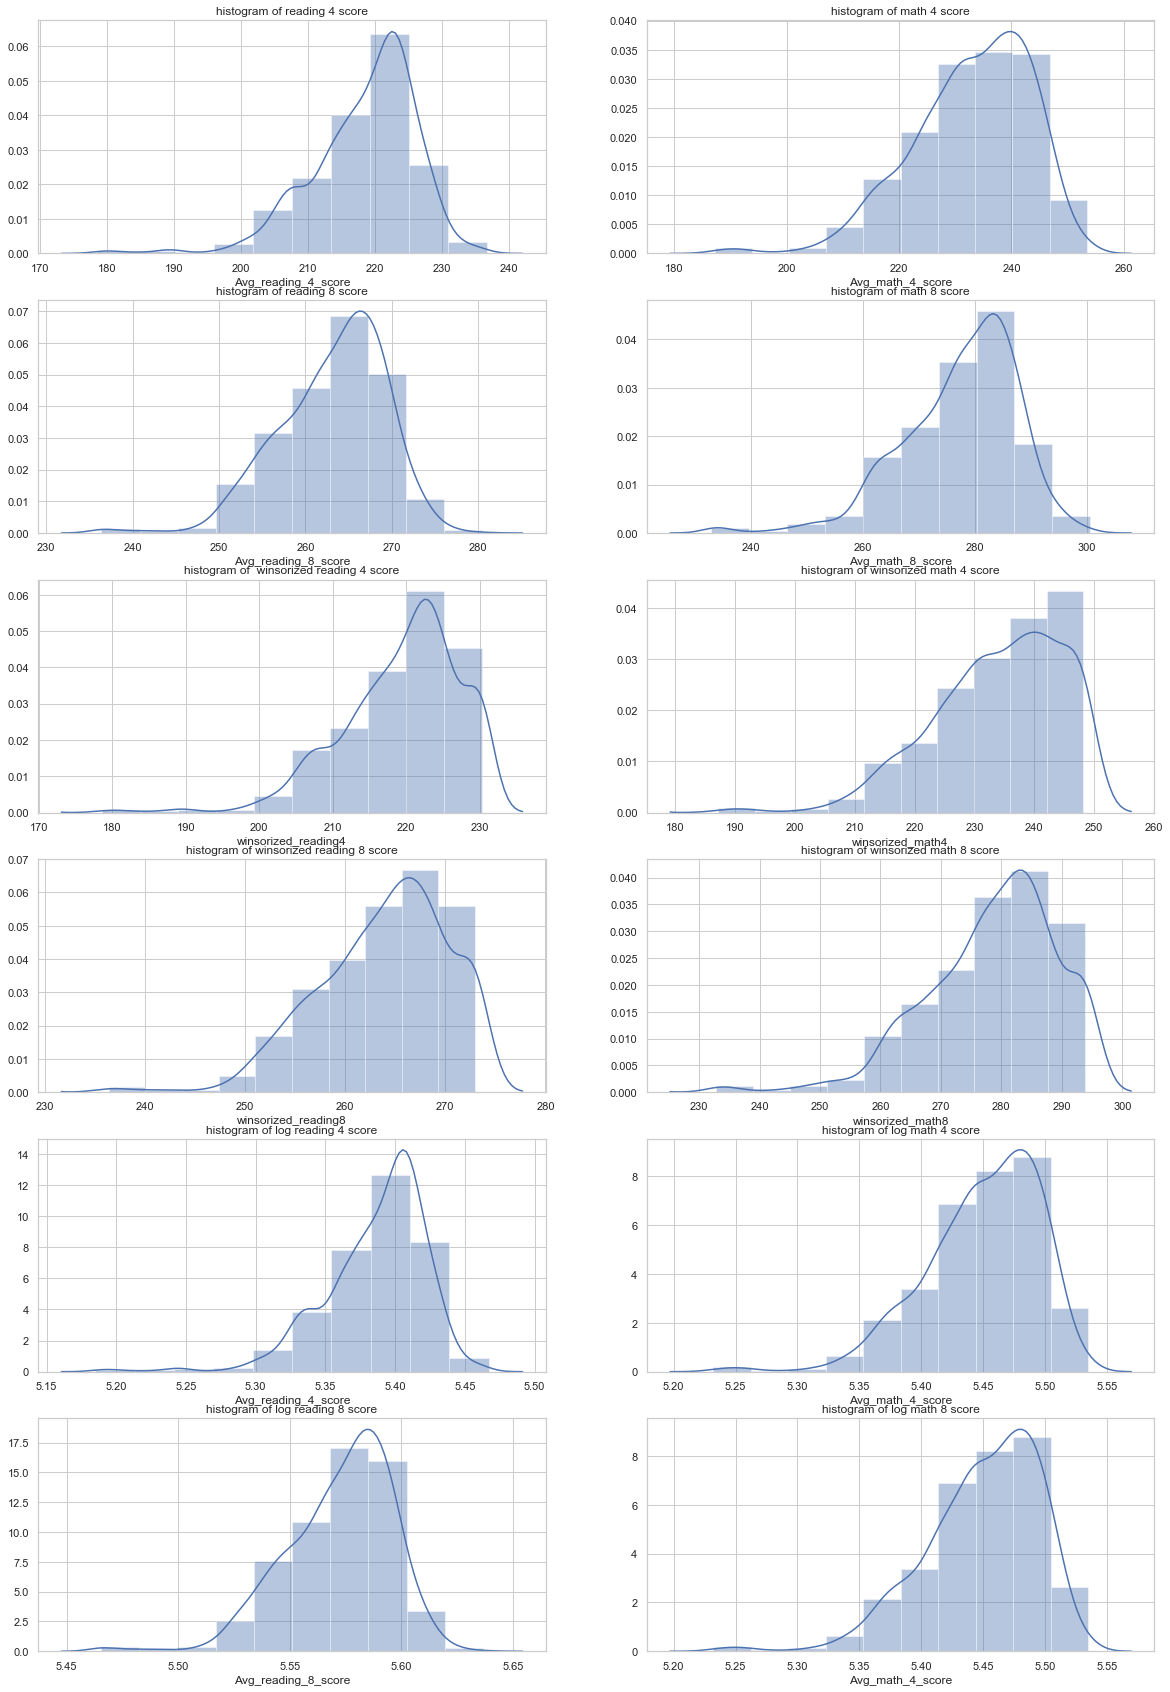

In [158]:
plt.figure(figsize = (20,30))

#normal
plt.subplot(6,2,1)
sns.distplot(used_c['Avg_reading_4_score'], bins=10)
plt.title("histogram of reading 4 score")

plt.subplot(6,2,2)
sns.distplot(used_c['Avg_math_4_score'], bins=10)
plt.title("histogram of math 4 score")

plt.subplot(6,2,3)
sns.distplot(used_c['Avg_reading_8_score'], bins=10)
plt.title("histogram of reading 8 score")

plt.subplot(6,2,4)
sns.distplot(used_c['Avg_math_8_score'], bins = 10)
plt.title("histogram of math 8 score")

#winsorized
plt.subplot(6,2,5)
sns.distplot(used_c["winsorized_reading4"], bins=10)
plt.title("histogram of  winsorized reading 4 score")

plt.subplot(6,2,6)
sns.distplot(used_c["winsorized_math4"], bins=10)
plt.title("histogram of winsorized math 4 score")

plt.subplot(6,2,7)
sns.distplot(used_c["winsorized_reading8"], bins=10)
plt.title("histogram of winsorized reading 8 score")

plt.subplot(6,2,8)
sns.distplot(used_c["winsorized_math8"], bins = 10)
plt.title("histogram of winsorized math 8 score")

#log transformation
plt.subplot(6,2,9)
sns.distplot(np.log(used_c['Avg_reading_4_score']), bins=10)
plt.title("histogram of log reading 4 score")

plt.subplot(6,2,10)
sns.distplot(np.log(used_c['Avg_math_4_score']), bins=10)
plt.title("histogram of log math 4 score")

plt.subplot(6,2,11)
sns.distplot(np.log(used_c['Avg_reading_8_score']), bins=10)
plt.title("histogram of log reading 8 score")

plt.subplot(6,2,12)
sns.distplot(np.log(used_c['Avg_math_4_score']), bins = 10)
plt.title("histogram of log math 8 score")

plt.show()

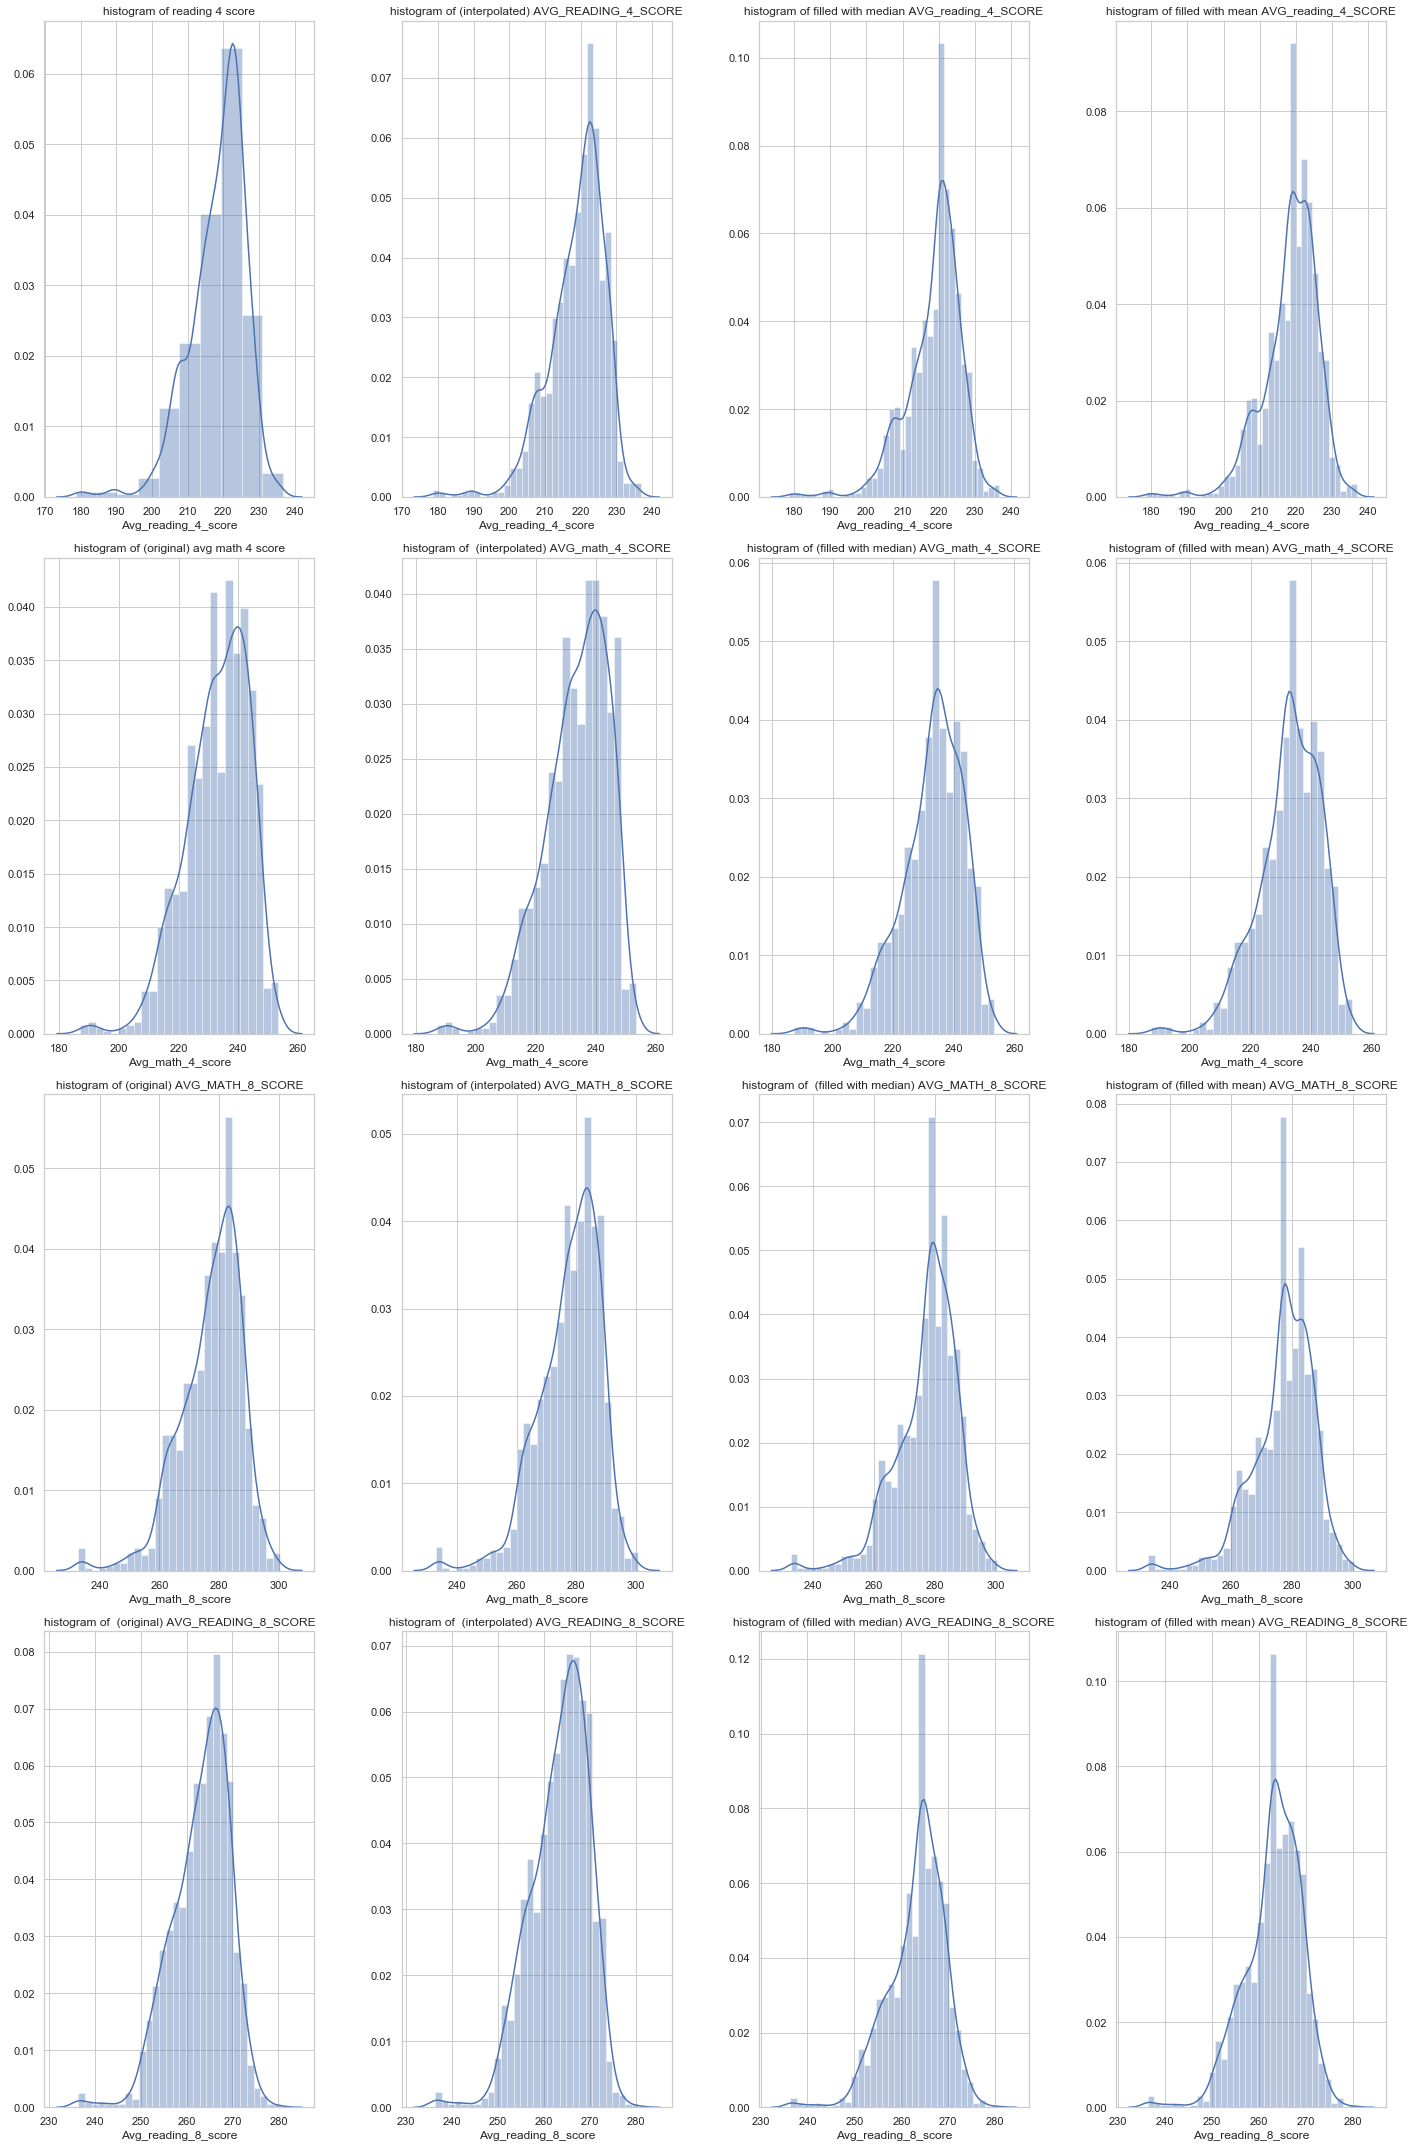

In [161]:
plt.figure(figsize = (20,30))

plt.subplot(4,4,1)
sns.distplot(used_c['Avg_reading_4_score'].dropna(), bins=10)
plt.title("histogram of reading 4 score")

plt.subplot(4,4,2)
sns.distplot(used_c['Avg_reading_4_score'].interpolate())
plt.title("histogram of (interpolated) AVG_READING_4_SCORE")

plt.subplot(4,4,3)
sns.distplot(used_c['Avg_reading_4_score'].fillna(used_c['Avg_reading_4_score'].median()))
plt.title("histogram of filled with median AVG_reading_4_SCORE")

plt.subplot(4,4,4)
sns.distplot(used_c['Avg_reading_4_score'].fillna(used_c['Avg_reading_4_score'].mean()))
plt.title("histogram of filled with mean AVG_reading_4_SCORE")


plt.subplot(4,4,5)
sns.distplot(used_c['Avg_math_4_score'].dropna())
plt.title("histogram of (original) avg math 4 score")

plt.subplot(4,4,6)
sns.distplot(used_c['Avg_math_4_score'].interpolate())
plt.title("histogram of  (interpolated) AVG_math_4_SCORE")

plt.subplot(4,4,7)
sns.distplot(used_c['Avg_math_4_score'].fillna(used_c['Avg_math_4_score'].median()))
plt.title("histogram of (filled with median) AVG_math_4_SCORE")

plt.subplot(4,4,8)
sns.distplot(used_c['Avg_math_4_score'].fillna(used_c['Avg_math_4_score'].mean()))
plt.title("histogram of (filled with mean) AVG_math_4_SCORE")


plt.subplot(4,4,9)
sns.distplot(used_c['Avg_math_8_score'].dropna())
plt.title("histogram of (original) AVG_MATH_8_SCORE")

plt.subplot(4,4,10)
sns.distplot(used_c['Avg_math_8_score'].interpolate())
plt.title("histogram of (interpolated) AVG_MATH_8_SCORE")

plt.subplot(4,4,11)
sns.distplot(used_c['Avg_math_8_score'].fillna(used_c['Avg_math_8_score'].median()))
plt.title("histogram of  (filled with median) AVG_MATH_8_SCORE")

plt.subplot(4,4,12)
sns.distplot(used_c['Avg_math_8_score'].fillna(used_c['Avg_math_8_score'].mean()))
plt.title("histogram of (filled with mean) AVG_MATH_8_SCORE")


plt.subplot(4,4,13)
sns.distplot(used_c['Avg_reading_8_score'].dropna())
plt.title("histogram of  (original) AVG_READING_8_SCORE")

plt.subplot(4,4,14)
sns.distplot(used_c['Avg_reading_8_score'].interpolate().dropna())
plt.title("histogram of  (interpolated) AVG_READING_8_SCORE")

plt.subplot(4,4,15)
sns.distplot(used_c['Avg_reading_8_score'].fillna(used_c['Avg_reading_8_score'].median()))
plt.title("histogram of (filled with median) AVG_READING_8_SCORE")

plt.subplot(4,4,16)
sns.distplot(used_c['Avg_reading_8_score'].fillna(used_c['Avg_reading_8_score'].mean()))
plt.title("histogram of (filled with mean) AVG_READING_8_SCORE")

plt.tight_layout()
plt.show()

interpolate looks more close to normal distribution than filled with mean and median, as data filled with mean and median shows vast difference in distribution than interpolated one.